# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [4]:

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | santo antonio da platina
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | maricopa
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | la passe
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | nizhniy odes
Processing Record 9 of Set 1 | balangiga
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | meulaboh
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | bodaybo
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | la palma
Processing Record 19 of Set 1 | ormara
Processing Record 20 of Set 1 | la ronge
Processing Record 21 of Set 1 | portland
Processing Record 22 of Set 1 | kokoda
Processing Record 23 of Set 1 | fort mcmurray
Processing Record 24 of Set 1 |

In [5]:
city_url

'http://api.openweathermap.org/data/2.5/weather?q=ulladulla&appid=a2e646057e6a616a5ccdf60228e381ff&units=imperial'

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santo antonio da platina,-23.2950,-50.0772,60.37,90,40,5.55,BR,1706240969
1,ribeira grande,38.5167,-28.7000,59.77,87,100,8.01,PT,1706240969
2,maricopa,33.0581,-112.0476,59.32,77,40,5.99,US,1706240380
3,longyearbyen,78.2186,15.6401,40.84,70,20,4.61,SJ,1706240970
4,la passe,45.5549,-0.8967,51.98,91,94,7.00,FR,1706240970


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santo antonio da platina,-23.2950,-50.0772,60.37,90,40,5.55,BR,1706240969
1,ribeira grande,38.5167,-28.7000,59.77,87,100,8.01,PT,1706240969
2,maricopa,33.0581,-112.0476,59.32,77,40,5.99,US,1706240380
3,longyearbyen,78.2186,15.6401,40.84,70,20,4.61,SJ,1706240970
4,la passe,45.5549,-0.8967,51.98,91,94,7.00,FR,1706240970


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

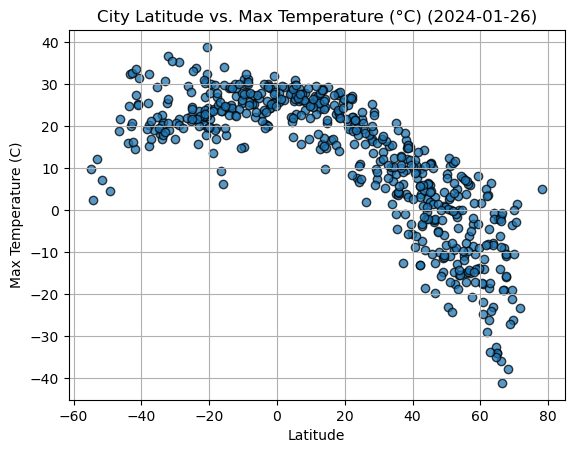

In [10]:
# Build scatter plot for latitude vs. temperature
formatted_date = time.strftime('%Y-%m-%d', time.gmtime(city_data_df['Date'].iloc[0]))
plt.scatter(city_data_df["Lat"], (city_data_df["Max Temp"] - 32) * 5/9, edgecolors='black', alpha=0.75)
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (°C) ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

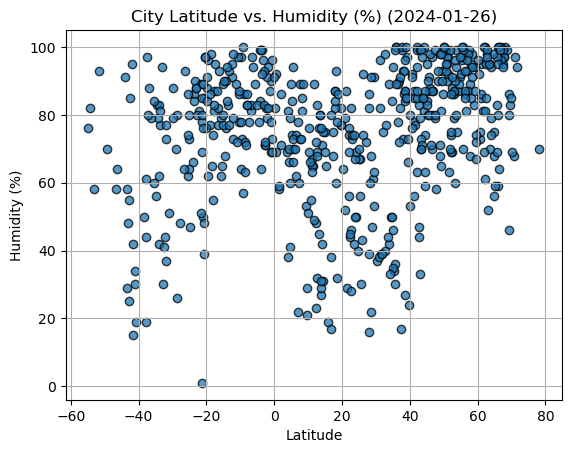

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

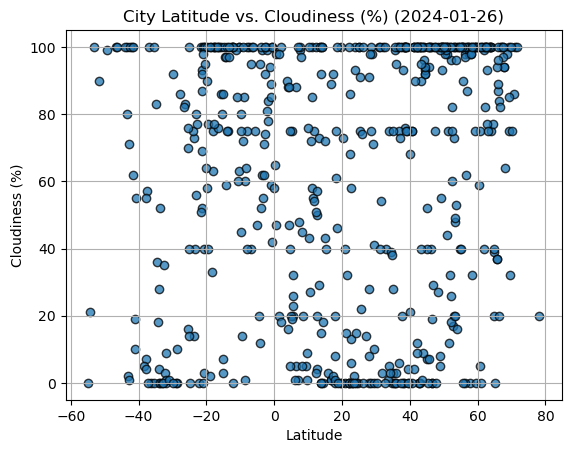

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

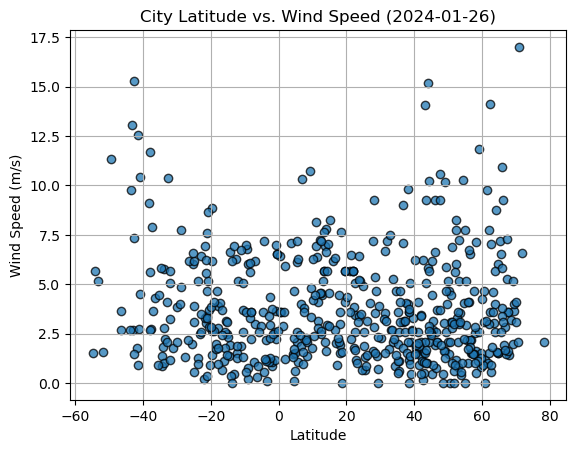

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"] * 0.44704, edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
temp_regression = linregress(city_data_df["Lat"], (city_data_df["Max Temp"] - 32) * 5/9)
temp_slope, temp_intercept, temp_r_value, temp_p_value, temp_std_err = temp_regression
temp_regression_line = temp_slope * city_data_df["Lat"] + temp_intercept
temp_regression_line

City_ID
0      27.750445
1       4.454649
2       6.511904
3     -10.508332
4       1.802070
         ...    
550    10.133037
551    23.137507
552    16.368193
553    13.713428
554    32.293773
Name: Lat, Length: 555, dtype: float64

In [15]:
humidity_regression = linregress(city_data_df["Lat"], city_data_df["Humidity"])
humidity_slope, humidity_intercept, humidity_r_value, humidity_p_value, humidity_std_err = humidity_regression
humidity_regression_line = humidity_slope * city_data_df["Lat"] + humidity_intercept
humidity_regression_line

City_ID
0      68.482229
1      77.832236
2      77.006535
3      83.837782
4      78.896876
         ...    
550    75.553157
551    70.333679
552    73.050612
553    74.116130
554    66.658717
Name: Lat, Length: 555, dtype: float64

In [16]:
cloudy_regression = linregress(city_data_df["Lat"], city_data_df["Cloudiness"])
cloudy_slope, cloudy_intercept, cloudy_r_value, cloudy_p_value, cloudy_std_err = cloudy_regression
cloudy_regression_line = cloudy_slope * city_data_df["Lat"] + cloudy_intercept
cloudy_regression_line

City_ID
0      53.784957
1      64.044875
2      63.138820
3      70.634860
4      65.213122
         ...    
550    61.544004
551    55.816584
552    58.797920
553    59.967130
554    51.783988
Name: Lat, Length: 555, dtype: float64

In [17]:
wind_speed_regression = linregress(city_data_df["Lat"], city_data_df["Wind Speed"] * 0.44704)
wind_speed_slope, wind_speed_intercept, wind_speed_r_value, wind_speed_p_value, wind_speed_std_err = wind_speed_regression
wind_speed_regression_line = wind_speed_slope * city_data_df["Lat"] + wind_speed_intercept
wind_speed_regression_line

City_ID
0      3.844850
1      3.561102
2      3.586160
3      3.378849
4      3.528793
         ...   
550    3.630266
551    3.788663
552    3.706211
553    3.673876
554    3.900188
Name: Lat, Length: 555, dtype: float64

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ribeira grande,38.5167,-28.7000,59.77,87,100,8.01,PT,1706240969
2,maricopa,33.0581,-112.0476,59.32,77,40,5.99,US,1706240380
3,longyearbyen,78.2186,15.6401,40.84,70,20,4.61,SJ,1706240970
4,la passe,45.5549,-0.8967,51.98,91,94,7.00,FR,1706240970
7,nizhniy odes,63.6445,54.8560,18.01,95,100,6.78,RU,1706240970


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santo antonio da platina,-23.2950,-50.0772,60.37,90,40,5.55,BR,1706240969
5,puerto natales,-51.7236,-72.4875,45.05,93,90,3.53,CL,1706240970
6,lebu,-37.6167,-73.6500,59.58,97,57,6.08,CL,1706240970
13,port alfred,-33.5906,26.8910,69.80,77,52,4.99,ZA,1706240970
16,avarua,-21.2078,-159.7750,80.65,78,87,10.36,CK,1706240971


###  Temperature vs. Latitude Linear Regression Plot

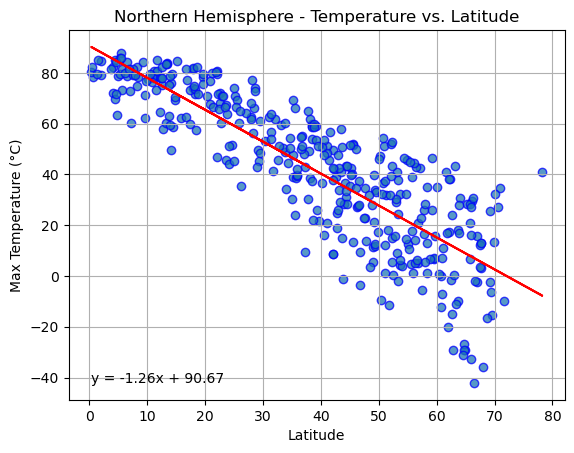

The r-value is: -0.8507547977653079 


In [20]:
# Linear regression on Northern Hemisphere
northern_temp_regression = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
northern_temp_slope, northern_temp_intercept, northern_temp_r_value, northern_temp_p_value, northern_temp_std_err = northern_temp_regression
northern_temp_regression_line = northern_temp_slope * northern_hemi_df["Lat"] + northern_temp_intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors='blue', alpha=0.75, label="Northern Hemisphere")
plt.plot(northern_hemi_df["Lat"], northern_temp_slope * northern_hemi_df["Lat"] + northern_temp_intercept, color='red', label="Northern Hemisphere Regression")
annotation_text = f"y = {northern_temp_slope:.2f}x + {northern_temp_intercept:.2f}"
plt.annotate(annotation_text, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Max Temp"])), fontsize=10, color='black')
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

plt.savefig("output_data/Northern_Temperature_Lat_Regression.png")
plt.show()

print(f"The r-value is: {northern_temp_r_value} ")

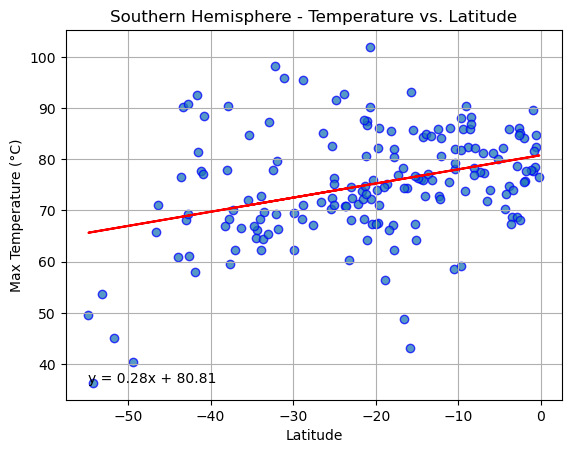

The r-value is: 0.3480415681644173 


In [21]:
# Linear regression on Southern Hemisphere
southern_temp_regression = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
southern_temp_slope, southern_temp_intercept, southern_temp_r_value, southern_temp_p_value, southern_temp_std_err = southern_temp_regression
southern_temp_regression_line = southern_temp_slope * southern_hemi_df["Lat"] + southern_temp_intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors='blue', alpha=0.75, label="Southern Hemisphere")
plt.plot(southern_hemi_df["Lat"], southern_temp_slope * southern_hemi_df["Lat"] + southern_temp_intercept, color='red', label="Southern Hemisphere Regression")
annotation_text_1 = f"y = {southern_temp_slope:.2f}x + {southern_temp_intercept:.2f}"
plt.annotate(annotation_text_1, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Max Temp"])), fontsize=10, color='black')
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

plt.savefig("output_data/Southern_Temperature_Lat_Regression.png")
plt.show()

print(f"The r-value is: {southern_temp_r_value} ")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

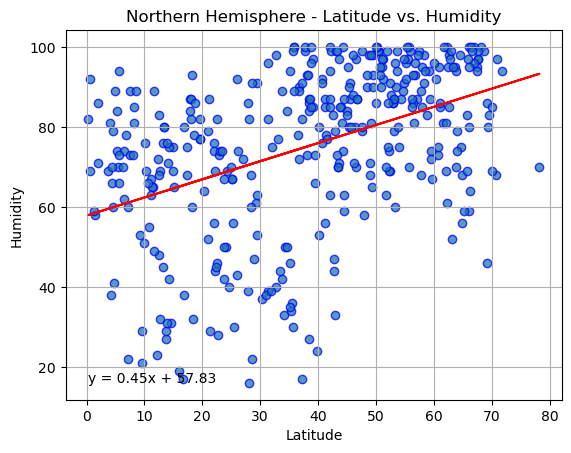

The r-value is: 0.432561643228584 


In [22]:
northern_humidity_regression = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
northern_humidity_slope, northern_humidity_intercept, northern_humidity_r_value, northern_humidity_p_value, northern_humiditystd_err = northern_humidity_regression
northern_humidity_regression_line = northern_humidity_slope * northern_hemi_df["Lat"] + northern_humidity_intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors='blue', alpha=0.75, label="Northern Hemisphere")
plt.plot(northern_hemi_df["Lat"], northern_humidity_slope * northern_hemi_df["Lat"] + northern_humidity_intercept, color='red', label="Northern Hemisphere Regression")
annotation_text_2 = f"y = {northern_humidity_slope:.2f}x + {northern_humidity_intercept:.2f}"
plt.annotate(annotation_text_2, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Humidity"])), fontsize=10, color='black')
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

plt.savefig("output_data/Northern_Humidity_Lat_Regression.png")
plt.show()

print(f"The r-value is: {northern_humidity_r_value} ")

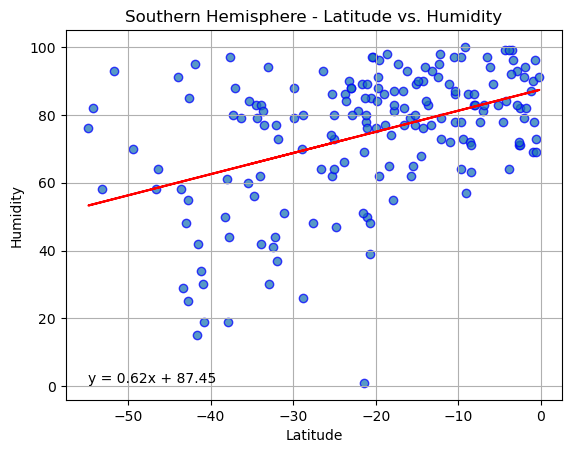

The r-value is: 0.4362176347084725 


In [23]:
southern_humidity_regression = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
southern_humidity_slope, southern_humidity_intercept, southern_humidity_r_value, southern_humidity_p_value, southern_humidity_std_err = southern_humidity_regression
southern_humidity_regression_line = southern_humidity_slope * southern_hemi_df["Lat"] + southern_humidity_intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors='blue', alpha=0.75, label="Southern Hemisphere")
plt.plot(southern_hemi_df["Lat"], southern_humidity_slope * southern_hemi_df["Lat"] + southern_humidity_intercept, color='red', label="Southern Hemisphere Regression")
annotation_text_3 = f"y = {southern_humidity_slope:.2f}x + {southern_humidity_intercept:.2f}"
plt.annotate(annotation_text_3, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Humidity"])), fontsize=10, color='black')
plt.title("Southern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

plt.savefig("output_data/Southern_Humidity_Lat_Regression.png")
plt.show()

print(f"The r-value is: {southern_humidity_r_value} ")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

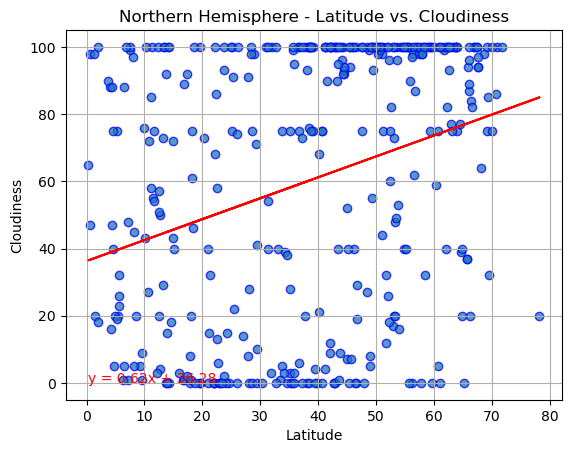

The r-value is: 0.30371650396379163 


In [24]:
# Northern Hemisphere
northern_cloudiness_regression = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
northern_cloudiness_slope, northern_cloudiness_intercept, northern_cloudiness_r_value, northern_cloudiness_p_value, northern_cloudiness_std_err = northern_cloudiness_regression
northern_cloudiness_regression_line = northern_cloudiness_slope * northern_hemi_df["Lat"] + northern_cloudiness_intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors='blue', alpha=0.75, label="Northern Hemisphere")
plt.plot(northern_hemi_df["Lat"], northern_cloudiness_slope * northern_hemi_df["Lat"] + northern_cloudiness_intercept, color='red', label="Northern Hemisphere Regression")
annotation_text_4 = f"y = {northern_cloudiness_slope:.2f}x + {northern_cloudiness_intercept:.2f}"
plt.annotate(annotation_text_4, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Cloudiness"])), fontsize=10, color='red')
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

plt.savefig("output_data/Northern_Cloudiness_Lat_Regression.png")
plt.show()

print(f"The r-value is: {northern_cloudiness_r_value} ")

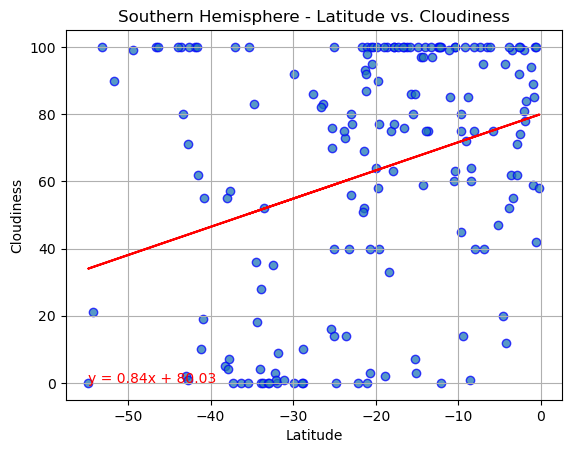

The r-value is: 0.307347810316575 


In [25]:
# Southern Hemisphere
southern_cloudiness_regression = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
southern_cloudiness_slope, southern_cloudiness_intercept, southern_cloudiness_r_value, southern_cloudiness_p_value, southern_cloudiness_std_err = southern_cloudiness_regression
southern_cloudiness_regression_line = southern_cloudiness_slope * southern_hemi_df["Lat"] + southern_cloudiness_intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors='blue', alpha=0.75, label="Southern Hemisphere")
plt.plot(southern_hemi_df["Lat"], southern_cloudiness_slope * southern_hemi_df["Lat"] + southern_cloudiness_intercept, color='red', label="Southern Hemisphere Regression")
annotation_text_5 = f"y = {southern_cloudiness_slope:.2f}x + {southern_cloudiness_intercept:.2f}"
plt.annotate(annotation_text_5, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Cloudiness"])), fontsize=10, color='red')
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

plt.savefig("output_data/Southern_Cloudiness_Lat_Regression.png")
plt.show()

print(f"The r-value is: {southern_cloudiness_r_value} ")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

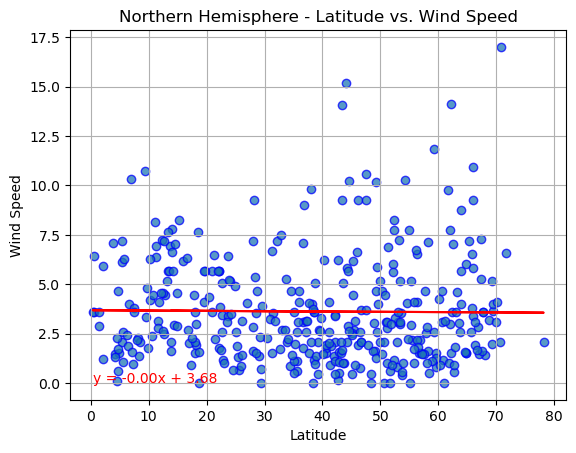

The r-value is: -0.011276245965371218 


In [26]:
# Northern Hemisphere
northern_windspeed_regression = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"] * 0.44704)
northern_windspeed_slope, northern_windspeed_intercept, northern_windspeed_r_value, northern_windspeed_p_value, northern_windspeed_std_err = northern_windspeed_regression
northern_windspeed_regression_line = northern_windspeed_slope * northern_hemi_df["Lat"] + northern_windspeed_intercept

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"] * 0.44704, edgecolors='blue', alpha=0.75, label="Northern Hemisphere")
plt.plot(northern_hemi_df["Lat"], northern_windspeed_slope * northern_hemi_df["Lat"] + northern_windspeed_intercept, color='red', label="Northern Hemisphere Regression")
annotation_text_6 = f"y = {northern_windspeed_slope:.2f}x + {northern_windspeed_intercept:.2f}"
plt.annotate(annotation_text_6, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Wind Speed"])), fontsize=10, color='red')
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

plt.savefig("output_data/Northern_WindSpeed_Lat_Regression.png")
plt.show()

print(f"The r-value is: {northern_windspeed_r_value} ")

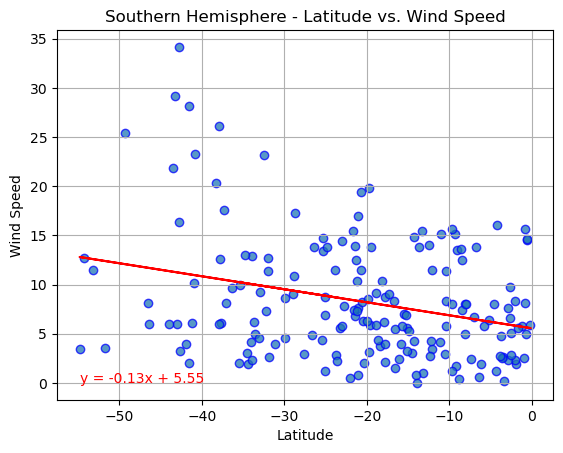

The r-value is: -0.2895754082844456 


In [27]:
# Southern Hemisphere
southern_windspeed_regression = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
southern_windspeed_slope, southern_windspeed_intercept, southern_windspeed_r_value, southern_windspeed_p_value, southern_windspeed_std_err = southern_windspeed_regression
southern_windspeed_regression_line = southern_windspeed_slope * southern_hemi_df["Lat"] + southern_windspeed_intercept

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors='blue', alpha=0.75, label="Southern Hemisphere")
plt.plot(southern_hemi_df["Lat"], southern_windspeed_slope * southern_hemi_df["Lat"] + southern_windspeed_intercept, color='red', label="Southern Hemisphere Regression")
annotation_text_7 = f"y = {southern_windspeed_slope:.2f}x + {southern_windspeed_intercept:.2f}"
plt.annotate(annotation_text_7, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Wind Speed"])), fontsize=10, color='red')
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

plt.savefig("output_data/Southern_WindSpeed_Lat_Regression.png")
plt.show()

print(f"The r-value is: {southern_windspeed_r_value} ")

**Discussion about the linear relationship:** YOUR RESPONSE HERE